In [9]:
import json
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def read_jsonl(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            data.append(json.loads(line))
    return data

In [11]:


# Example usage
file_path = r"C:\Users\moham\Desktop\learningMachines\examples\full_project_setup\results\checkpoint_new32_16.jsonl"
data = read_jsonl(file_path)


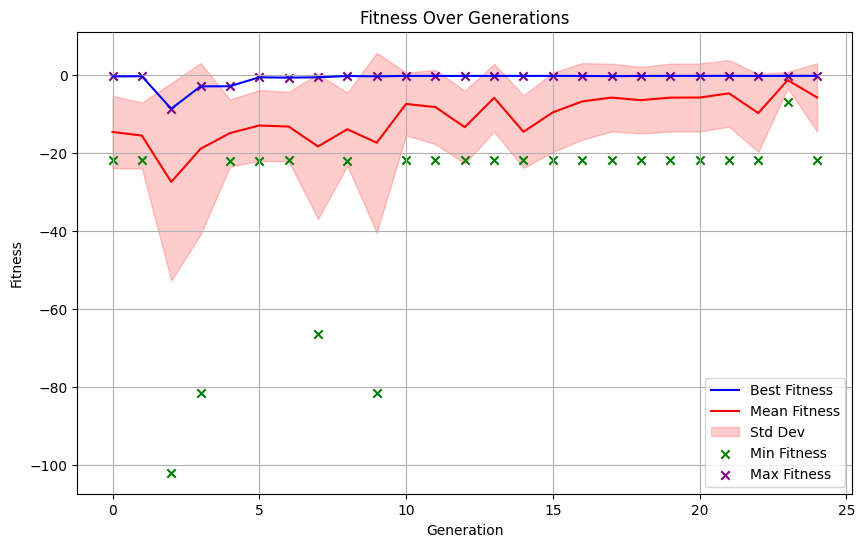

In [12]:

# Prepare data for plotting
generations = [d["generation"] for d in data]
best_fitnesses = [d["best_fitness"] for d in data]
mean_fitnesses = [np.mean(d["fitnesses"]) for d in data]
std_fitnesses = [np.std(d["fitnesses"]) for d in data]
min_fitnesses = [np.min(d["fitnesses"]) for d in data]
max_fitnesses = [np.max(d["fitnesses"]) for d in data]

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(generations, best_fitnesses, label='Best Fitness', color='blue')
plt.plot(generations, mean_fitnesses, label='Mean Fitness', color='red')
plt.fill_between(generations, np.array(mean_fitnesses) - np.array(std_fitnesses),
                 np.array(mean_fitnesses) + np.array(std_fitnesses), color='red', alpha=0.2, label='Std Dev')
plt.scatter(generations, min_fitnesses, label='Min Fitness', color='green', marker='x')
plt.scatter(generations, max_fitnesses, label='Max Fitness', color='purple', marker='x')

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness Over Generations')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
hardware_file = r"C:\Users\moham\Desktop\learningMachines\examples\full_project_setup\results\sensor_data_hardware.jsonl"
simulation_file = r"C:\Users\moham\Desktop\learningMachines\examples\full_project_setup\results\sensor_data_simulation.jsonl"

simulation_data = read_jsonl(simulation_file)
hardware_data = read_jsonl(hardware_file)

In [13]:
import numpy as np

def process_data(data):
    processed_data = {'FrontC': [], 'FrontR': [], 'FrontL': [], 'FrontRR': [], 'FrontLL': []}
    for step in data:
        for key in processed_data.keys():
            processed_data[key].append(step[key])
    return processed_data

simulation_processed = process_data(simulation_data)
hardware_processed = process_data(hardware_data)


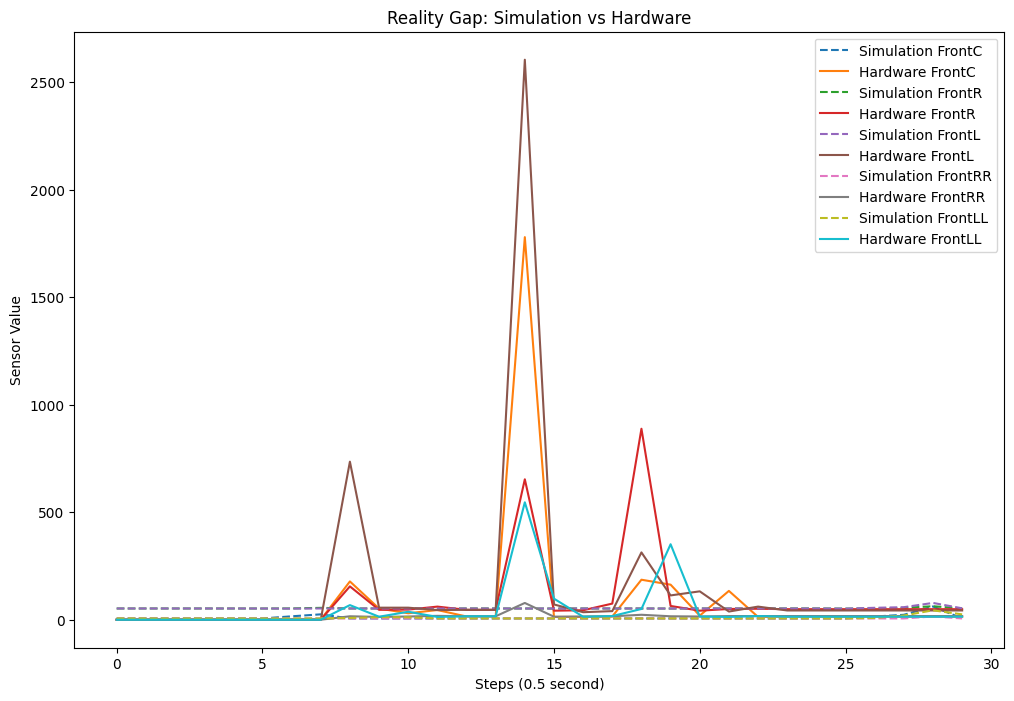

In [14]:
import matplotlib.pyplot as plt

def plot_reality_gap(simulation_processed, hardware_processed):
    steps = range(len(simulation_processed['FrontC']))

    plt.figure(figsize=(12, 8))

    for sensor in simulation_processed.keys():
        plt.plot(steps, simulation_processed[sensor], label=f'Simulation {sensor}', linestyle='--')
        plt.plot(steps, hardware_processed[sensor], label=f'Hardware {sensor}', linestyle='-')

    plt.xlabel('Steps (0.5 second)')
    plt.ylabel('Sensor Value')
    plt.title('Reality Gap: Simulation vs Hardware')
    plt.legend()
    plt.show()

plot_reality_gap(simulation_processed, hardware_processed)
